# Testing Your Network 

So far you have been working with fully connected, or densely connected networks. These networks work well for extremely well-defined problems, like with the MNIST dataset, but it isn't very good at extracting more general information about a picture.

Follow along with this to see how the network from the previous lesson does on a new picture of a handwritten digit. 

1. Run this cell to import everything you need to run this demonstration

In [1]:
from keras.preprocessing import image
from PIL import Image,ImageChops 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

def predict_image(model, x):
    x = x.astype('float32')
    x = x / 255.0

    x = np.expand_dims(x, axis=0)

    image_predict = model.predict(x, verbose=0)
    print("Predicted Label: ", np.argmax(image_predict))

    plt.imshow(np.squeeze(x))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return image_predict

def plot_value_array(predictions_array, true_label, h):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([(-1*h), h])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.show()

model = tf.keras.models.load_model('my_model.h5')

2. Run this cell to download an image to test the network with.

3. Run the next cell to see the look at a densely connected network's prediction for this image.

Predicted Label:  4


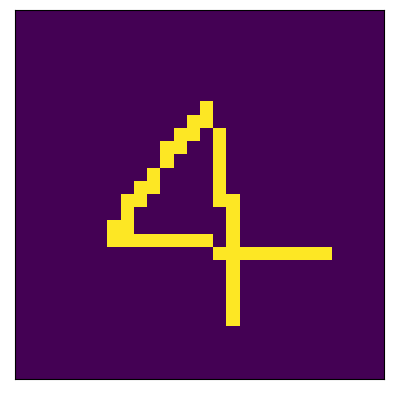

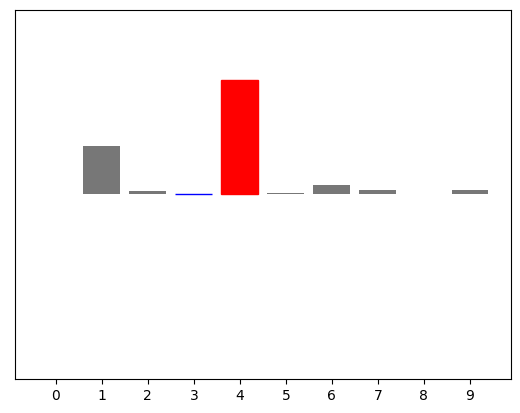

In [14]:
path = "test.jpg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(28,28), color_mode = "grayscale")
x = tf.keras.preprocessing.image.img_to_array(img)
true_label = 3
p_arr = predict_image(model, x)
plot_value_array(p_arr, true_label, 1)

The predicted label is printed at the top.
The image itself is next. 
The graph is a plot of the output layer. 


4. Write down three things you notice about it.
5. Then run the cell below, to see the same information about the image with the colors inverted.

Predicted Label:  5


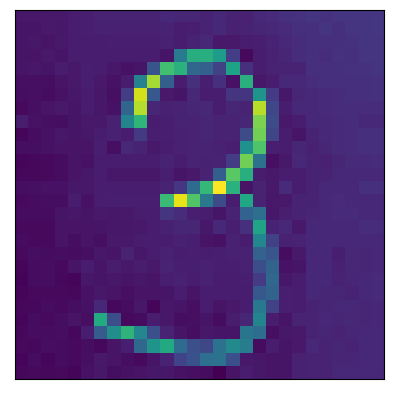

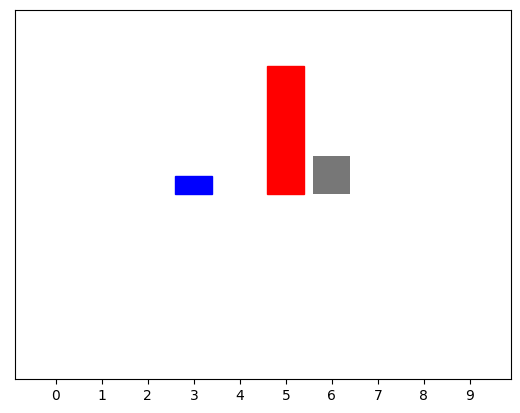

In [3]:
x_inv = 255-x
arr = predict_image(model, x_inv)
plot_value_array(arr, 3, 1)

6. Write down the major changes in this image. Why do you think this is?

Forming theories for why a network is operating in a certain way is an important part of machine learning.

The network can correctly predict images, but only in a very specific set of parameters.

 Since all of the training images are white drawings with black backgrounds, when the network tries to guess what an image with a white background is, it has a much harder time making conclusions.
 
![HI](https://i.imgur.com/UsUrDyb.png)

Your first guess might be to invert some of the training data so that the network is able to practice on both white backgrounds and black backgrounds. Let's see if it works.

## Fixing the Flaws
The cell below has all the data preparation code that you wrote for the network that you made. In order to test this theory out, you will add code to invert some of the images in the dataset in order to train the network to recognize images with white backgrounds and black text. 

1. On line 21, add `train_images[30000:]=255-train_images[30000:]` to invert some of the images
2. Run the cell to prepare the data with some inverted images, and see some image examples.

(60000, 28, 28)
(10000, 28, 28)


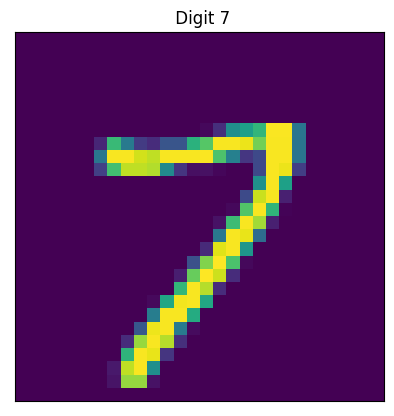

0 255


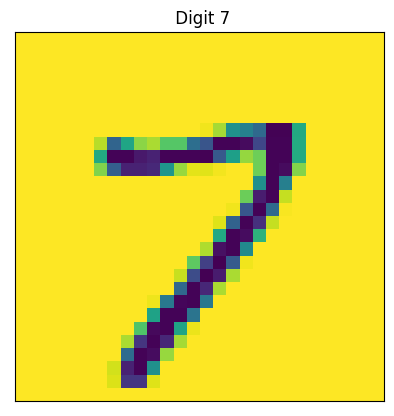

0.0 1.0


In [4]:
# Set variables to keep track of the number rows and columns for each image
img_rows, img_cols = 28, 28  
# Set a variable to keep track of the number of output classes
num_classes = 10 
# Load the train and test data, and a backup of each
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data() 
# Print the shape to confirm it's the right data
print(train_images.shape) 
print(test_images.shape) 
# Reshape the data
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
# Set an input shape variable to keep track of the input shape
input_shape = (img_rows, img_cols, 1)
# show an image and it's min and max
plot_image(train_images, 30001, train_labels)
show_min_max(train_images, 30001)

# Add code here to invert the images:
train_images[30000:]=255-train_images[30000:]

# Convert the data to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalize the data to values between 0 and 1
train_images /= 255
test_images /= 255
# Show the image and it's min and max now that the data has been adjusted
plot_image(train_images, 30001, train_labels)
show_min_max(train_images, 30001)
# Perform one hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

3. Run the cell below to train your network again. 

In [5]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

epochs = 10
model_inv = Sequential() 

model_inv.add(Flatten(input_shape=input_shape)) 
model_inv.add(Dense(16, activation='relu')) 
model_inv.add(Dense(10, activation='softmax')) 

model_inv.summary()

model_inv.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

model_inv.fit(train_images, train_labels, epochs=epochs) 

test_loss, test_acc = model_inv.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

model_inv.save('cnn_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 1.2721 - accuracy: 0.5305
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0028 - accuracy: 0.6099
Epoch 3/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.9471 - accuracy: 0.6346
Epoch 4/

Now it's time to see if it worked. Your model still might not get it right, but look at the graph of outputs, and try to understand what differences there are. Likely, you will still not get a network that will be able to recognize this digit. This demonstrates that your densely connected network is not particularly effective at generalizing what it learns.

3. Run this cell to see what the prediction of your new model is.

Predicted Label:  8


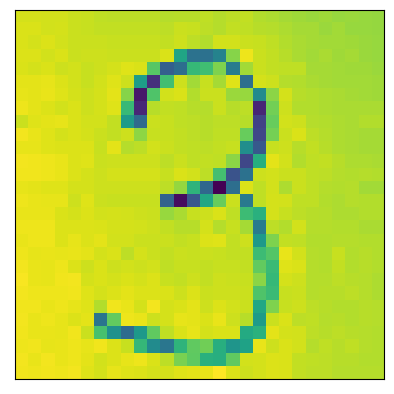

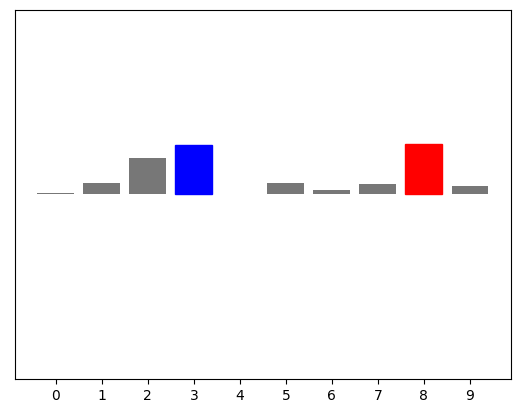

[[0.00969282 0.06233904 0.19631562 0.2690712  0.00261402 0.06089826
  0.02297582 0.0579984  0.27100405 0.04709085]]
[[0.00969282 0.06233904 0.19631562 0.2690712  0.00261402 0.06089826
  0.02297582 0.0579984  0.27100405 0.04709085]]


In [6]:
arr = predict_image(model_inv, x)
plot_value_array(arr, 3, 1)
print(arr)
print(arr)

As you can see this does fix the problem you were having, but imagine having to adjust the training data for every new aspect of a test image. This network's usefulness decreases every time the problem that it is trying to solve gets more general. And, since the more general the data gets, the less accurate the network is, you can understand how this kind of network will be less and less effective as the complexity of a problem goes up. 

So what is the solution? 

There is another kind of network called Convolutional Neural Networks. These networks are modeled after how a brain thinks, and are much more effective in extracting more general information out of an image than your fully connected network is. 

Follow along in the next lesson to create a Convolutional Neural Network. 

## What About The Convolutional Neural Network?

After you finish and export your convolutional neural network, come back here and run this cell to see if the convolutional neural network is more effective. 

Predicted Label:  8


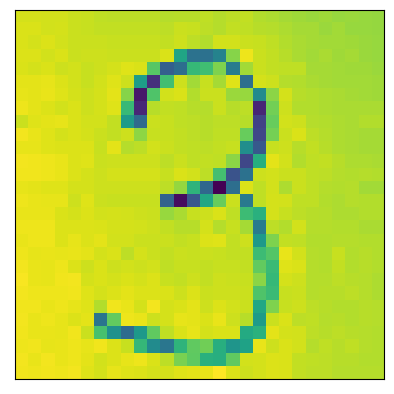

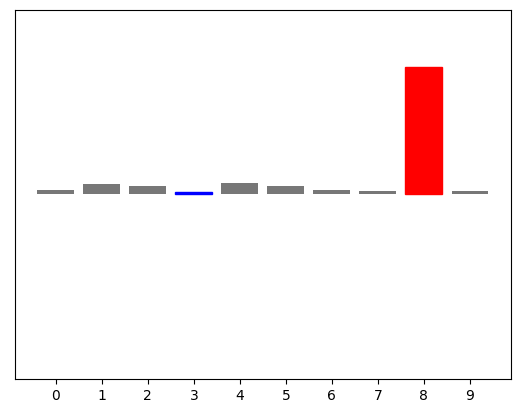

[[0.02637228 0.05619704 0.0433757  0.01601442 0.06058972 0.04445047
  0.02226002 0.01734743 0.69250685 0.02088602]]


In [8]:
cnn_model = tf.keras.models.load_model('cnn2_model.h5')
arr = predict_image(cnn_model, x)
plot_value_array(arr, 3, 1)
print(arr)